# Wine Vineyard Classification
#### By Aman Brar

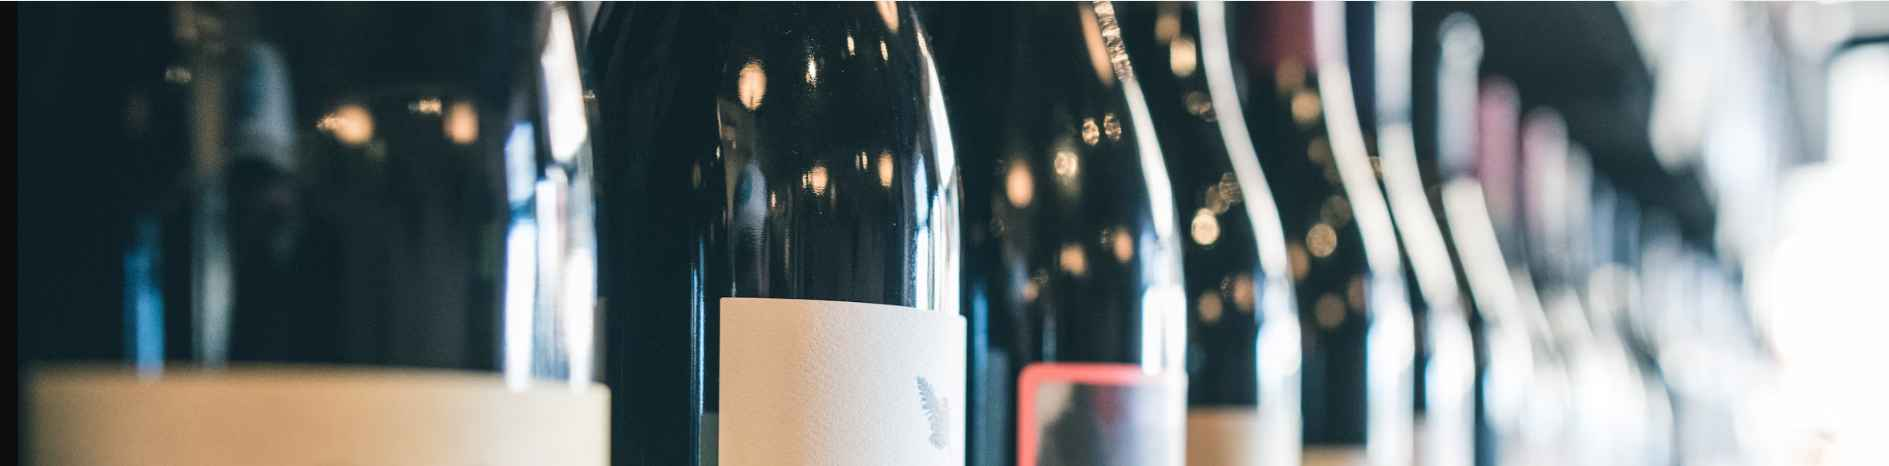

## Problem and Data Overview

In this project, I took a look a popular dataset about wine from the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/109/wine) which is also accessible via the sklearn dataset selection. The dataset consists of 13 measurements of different constituents found in the wines: 1) Alcohol 2) Malic acid 3) Ash 4) Alcalinity of ash 5) Magnesium 6) Total phenols 7) Flavanoids 8) Nonflavanoid phenols 9) Proanthocyanins 10)Color intensity 11)Hue 12)OD280/OD315 of diluted wines 13)Proline. There are 178 different wines featured coming from three seperate vineyards. The goal of this analysis is to understand how we can use these different attributes to identify which of the three vineyards each of the wines came from comparing how well an unsupervised model performs vs. a supervised model. This work is important for enhancing the authenticity and traceability of wines, which is crucial for protecting the integrity of renowned wine-producing regions and preventing mislabeling fraud in the industry. By accurately identifying a wine's origin, producers can safeguard their brand, consumers can be assured of the quality and provenance of their purchase, and regulators can more effectively monitor compliance with geographical indications.

In [1]:
import pandas as pd
import numpy as np

C:\Users\amans\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\amans\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
from sklearn.datasets import load_wine
wine_data = load_wine(as_frame=True)

wine_features_df = wine_data.data
wine_target_series = wine_data.target

wine_df = wine_features_df.copy()
wine_df['target'] = wine_target_series
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## Exploratory Data Analysis
In my exploratory data analysis, I started out trying to get a better idea of how many vineyards I am trying to predict and what the metrics look like for each of the wine's attributes. To understand the distribution of the different variables it was important to create violin plots to visualize if there are any abnormalities in any of the features. Then I proceeded to use the traditional definition of an outlier to get rid of any outstanding values in the dataset that could potentially have a great influence on the quality of the model. Lastly, I split the data into training and testing sets, so that when I build my supervised model I can assess its performance on new data.

In [3]:
wine_df.target.value_counts()

target
1    71
0    59
2    48
Name: count, dtype: int64

In [4]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [5]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

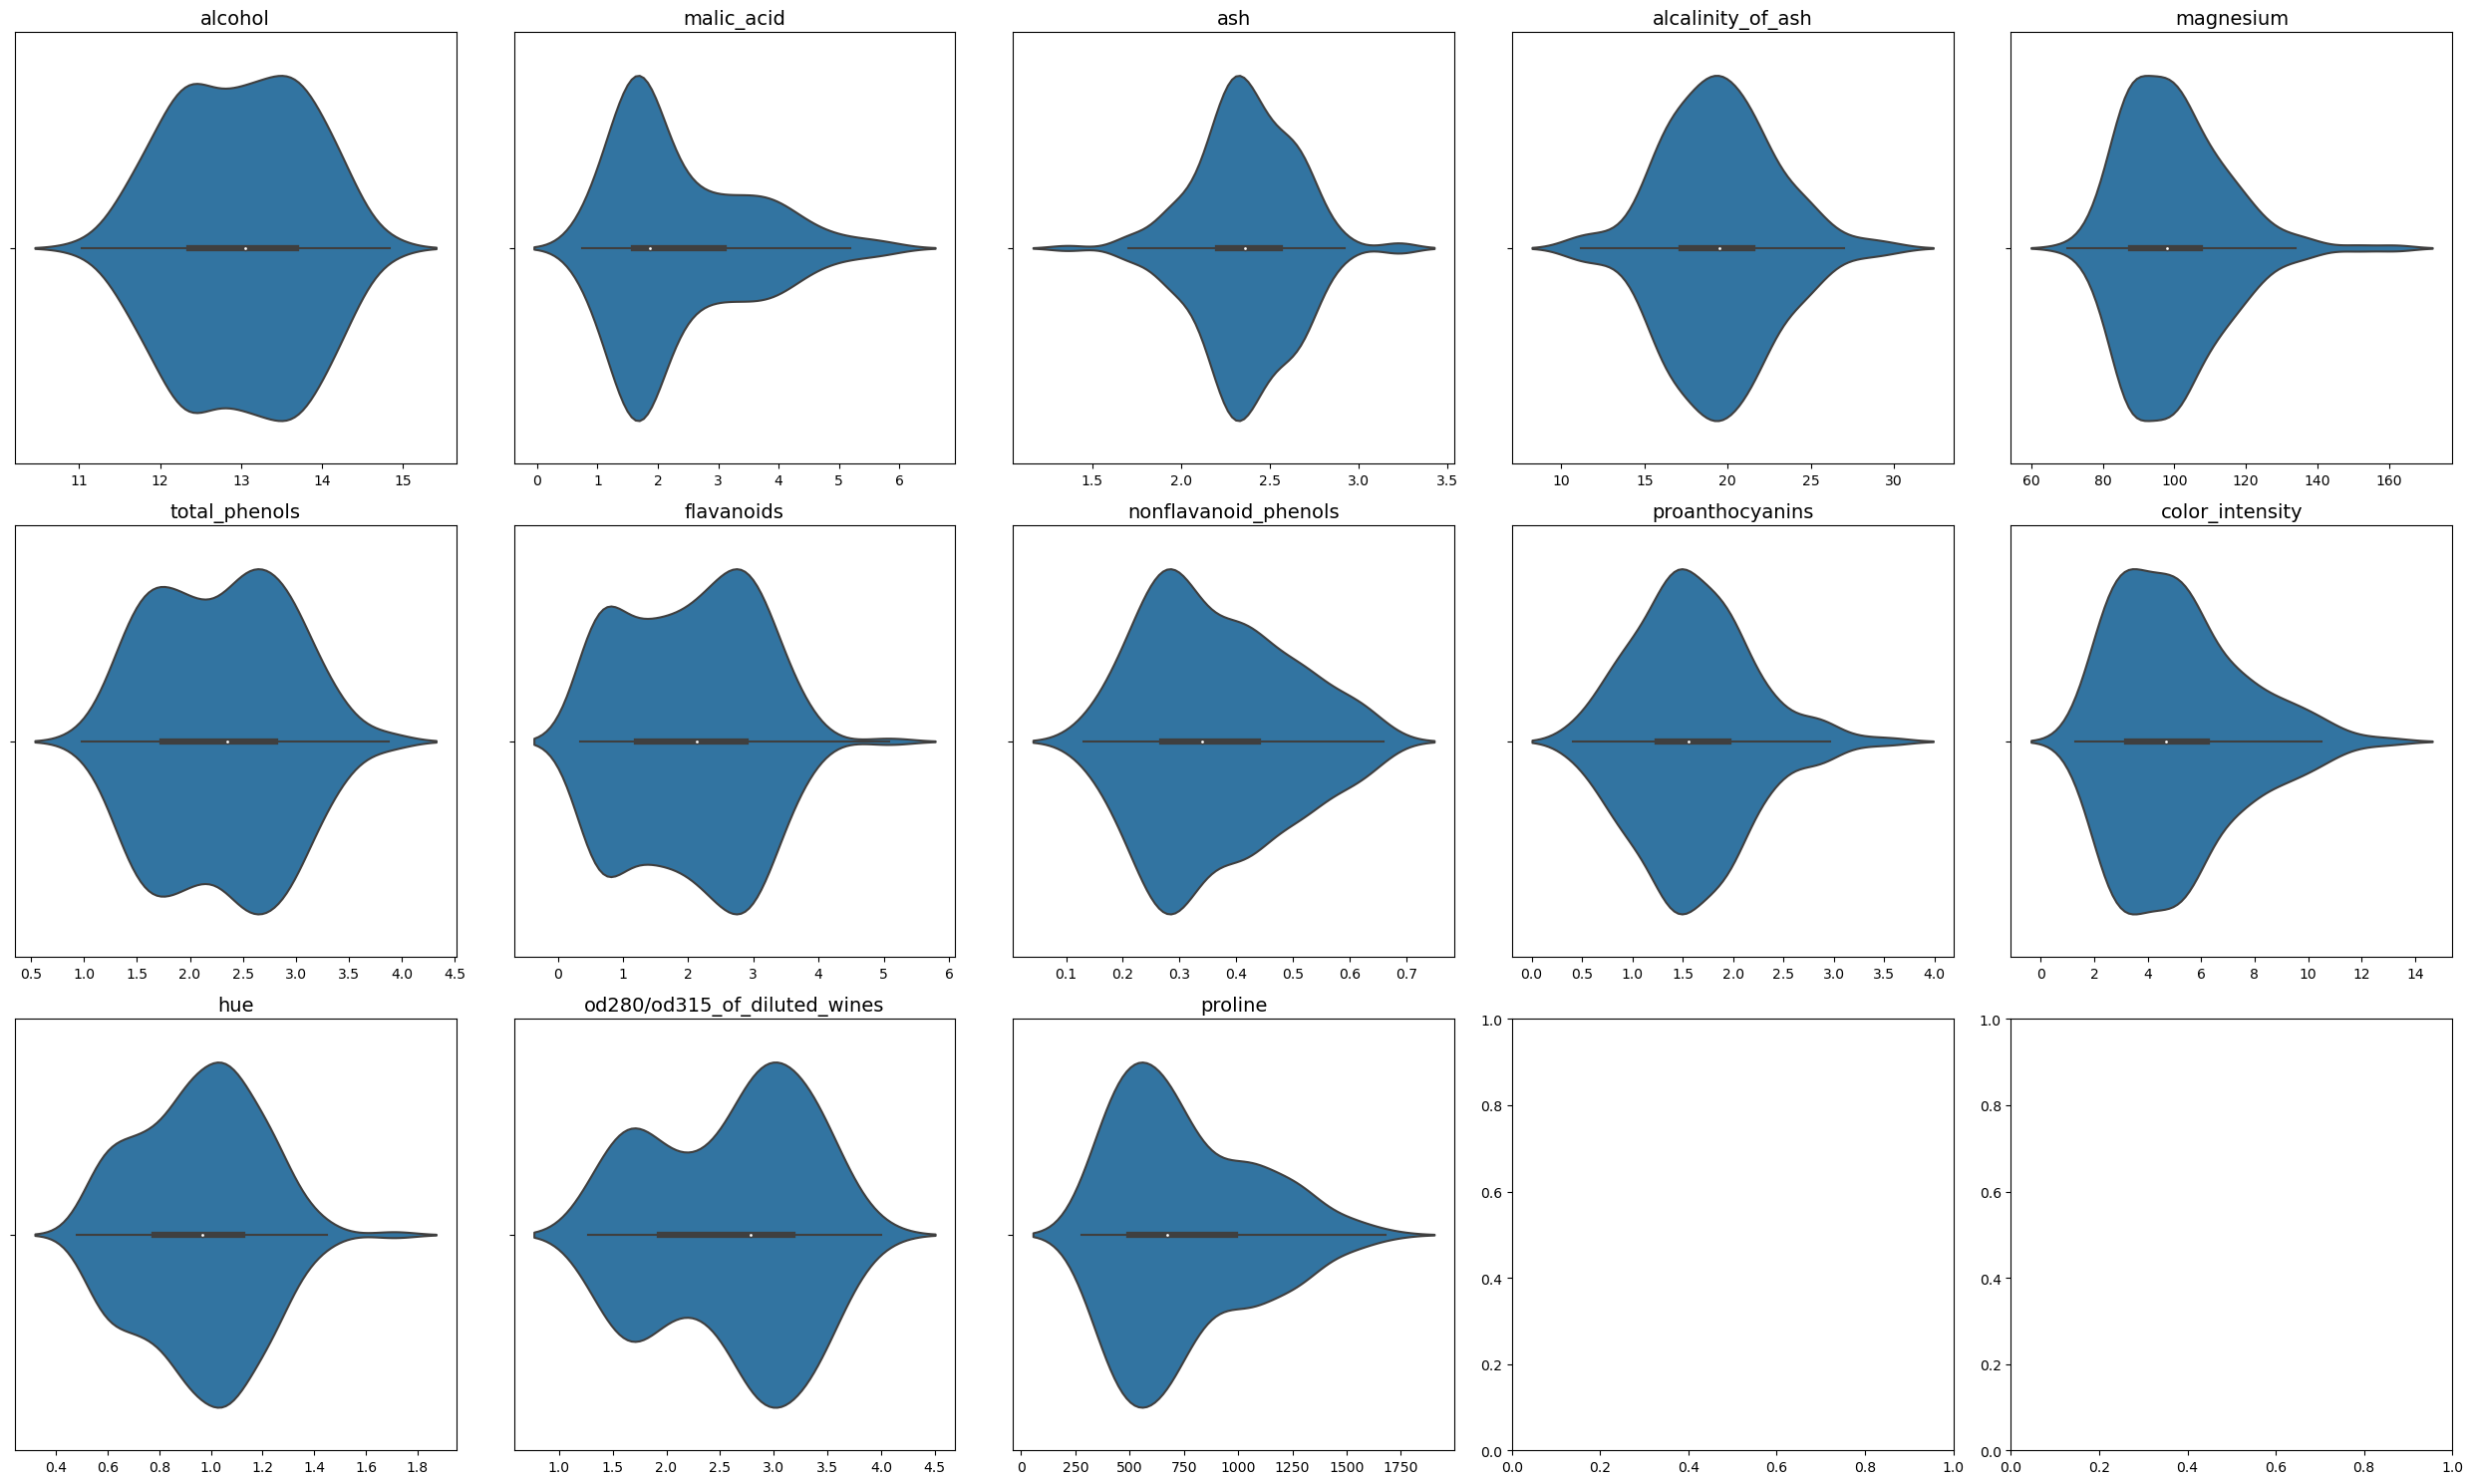

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
variables = [
    "alcohol", "malic_acid", "ash", "alcalinity_of_ash", "magnesium",
    "total_phenols", "flavanoids", "nonflavanoid_phenols", "proanthocyanins",
    "color_intensity", "hue", "od280/od315_of_diluted_wines", "proline"
]

fig, axes = plt.subplots(3, 5, figsize=(25, 15))
axes = axes.flatten()
for i, var in enumerate(variables):
    sns.violinplot(x=wine_df[var], ax=axes[i])
    axes[i].set_title(var, fontsize=14)
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()

In [7]:
def find_remove_outliers(df):
    df_cleaned = df.copy()
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        num_outliers = outliers.shape[0]
        print(f"{column}: {num_outliers} outliers")
        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
        df_cleaned = df_cleaned.dropna()
    return df_cleaned  

In [8]:
wine_df = find_remove_outliers(wine_df)
wine_df.describe()

alcohol: 0 outliers
malic_acid: 3 outliers
ash: 3 outliers
alcalinity_of_ash: 4 outliers
magnesium: 4 outliers
total_phenols: 0 outliers
flavanoids: 0 outliers
nonflavanoid_phenols: 0 outliers
proanthocyanins: 2 outliers
color_intensity: 4 outliers
hue: 1 outliers
od280/od315_of_diluted_wines: 0 outliers
proline: 0 outliers
target: 0 outliers


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,13.040373,2.306832,2.363292,19.232298,98.534161,2.290373,2.043789,0.358137,1.548075,5.014161,0.959106,2.628820,759.111801,0.900621
std,0.797841,1.048263,0.241205,3.014706,12.365290,0.632366,0.985649,0.121810,0.525859,2.117379,0.218049,0.709052,323.866465,0.784259
min,11.410000,0.740000,1.700000,11.200000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.540000,1.270000,278.000000,0.000000
25%,12.370000,1.610000,2.230000,17.100000,88.000000,1.720000,1.220000,0.270000,1.240000,3.270000,0.790000,2.010000,502.000000,0.000000
50%,13.070000,1.860000,2.360000,19.000000,98.000000,2.350000,2.140000,0.340000,1.530000,4.800000,0.980000,2.780000,675.000000,1.000000
75%,13.710000,3.030000,2.530000,21.000000,106.000000,2.800000,2.910000,0.430000,1.870000,6.200000,1.120000,3.180000,1035.000000,2.000000
max,14.830000,5.190000,2.920000,27.000000,134.000000,3.880000,3.930000,0.660000,2.960000,10.520000,1.450000,4.000000,1680.000000,2.000000


In [9]:
from sklearn.model_selection import train_test_split
X = wine_df.drop(['target'], axis=1)
y = wine_df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
X_train.shape, y_test.shape

((128, 13), (33,))

## Principal Component Analysis
I decided to use principal component analysis because I previously tried to build the agglomerative clustering model with all 13 features, but I could only achieve around 67% accuracy after tuning different parameters. After analyzing the associated confusion matrix for these first models two of the vineyards kept getting labeled the same, which made me think that perhaps two of the vineyards had some attributes that made them more alike than different. I then used PCA to reduced my number of components to 9 which I chose since around 95% of the variance is explained by the first nine components. 

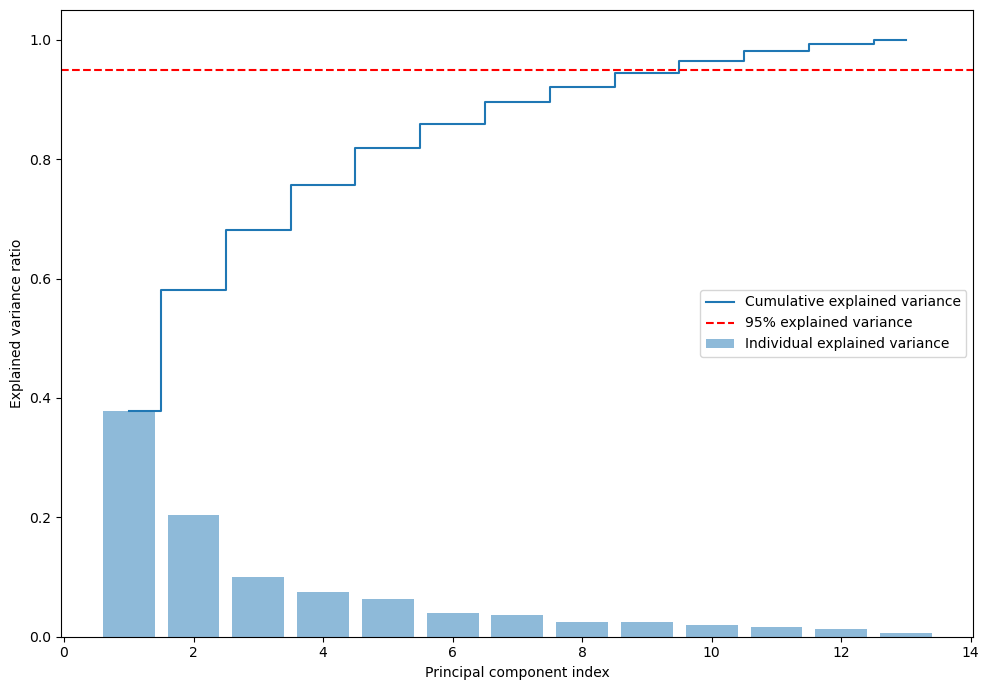

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
pca = PCA(n_components=min(X_train_scaled.shape))

pca.fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

plt.figure(figsize=(10, 7))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), where='mid',
         label='Cumulative explained variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [11]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
pca = PCA(n_components=9)

pca.fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

## Agglomerative Clustering Model
For my unsupervised model I chose an agglomerative clustering model. This data is well suited for agglomerative clustering since it has a number of identifiable features that can be broken down into three distinct clusters. To fine tune the model I tried all combinations of linkage methods and metrics to see which performed the best and the best model with an accuracy of 97.7% was achieved using "average" and"manhattan".

In [12]:
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=3)
model.fit(X_train_pca)
print(model.labels_)

[1 1 1 2 1 0 0 1 0 1 2 1 2 1 2 0 1 0 2 1 2 0 1 1 0 0 2 1 1 2 0 1 2 2 0 1 0
 1 0 1 0 0 1 2 1 1 2 1 2 2 1 1 1 0 1 1 2 1 0 1 0 1 1 2 0 0 0 0 0 0 2 1 2 0
 0 2 2 0 2 1 1 1 2 0 0 0 1 2 2 1 2 2 1 2 1 2 0 0 1 0 2 1 1 2 2 2 0 0 0 2 1
 0 1 2 2 2 1 2 0 0 1 1 0 1 0 2 0 0]


In [13]:
import itertools
from sklearn.metrics import accuracy_score, confusion_matrix
def label_permute_compare(ytdf,yp,n=3):
    unique_labels = sorted(ytdf.unique())
    permutations = itertools.permutations(range(n))
    best_permutation = None
    best_accuracy = 0
    label_to_id = {label: i for i, label in enumerate(unique_labels)}
    y_transformed = ytdf.map(label_to_id).to_numpy()

    for permutation in permutations:
        permuted_to_original = {permuted: original for permuted, original in enumerate(permutation)}
        yp_transformed = np.vectorize(permuted_to_original.get)(yp)
        accuracy = accuracy_score(y_transformed, yp_transformed)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_permutation = permutation

    return best_permutation, best_accuracy

In [14]:
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan', 'cosine', 'l2', 'l1']
best_score = -1
best_parameters = {}

for linkage in linkage_methods:
    for metric in metrics:
        if linkage == 'ward' and metric != 'euclidean':
            continue
        
        model = AgglomerativeClustering(n_clusters=3, metric=metric, linkage=linkage)
        model.fit(X_train_pca)
        labelorder, score = label_permute_compare(y_train, model.labels_)
        if score > best_score:
            best_score = score
            best_parameters = {'best parameters: linkage': linkage, 'metric': metric, 'score': score}

best_parameters

{'best parameters: linkage': 'average',
 'metric': 'manhattan',
 'score': 0.9765625}

In [15]:
def create_confusion_matrix(real_labels, predicted_labels, label_order):
    unique_labels = sorted(real_labels.unique())
    label_to_num = {label: num for num, label in zip(label_order, unique_labels)}
    real_labels_num = real_labels.map(label_to_num)
    order_to_num = {o: n for n, o in enumerate(label_order)}
    predicted_labels_reordered = np.array([order_to_num[label] for label in predicted_labels])
    conf_matrix = confusion_matrix(real_labels_num, predicted_labels_reordered)
    return conf_matrix

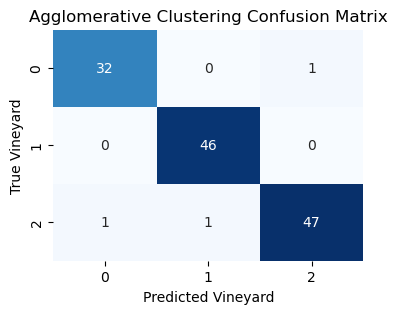

In [16]:
model=AgglomerativeClustering(n_clusters=3, metric='manhattan',linkage='average')
model.fit(X_train_pca)
labelorder, acc = label_permute_compare(y_train, model.labels_)
allgo_cm = create_confusion_matrix(y_train, model.labels_, labelorder)
plt.figure(figsize=(4, 3))
sns.heatmap(allgo_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Agglomerative Clustering Confusion Matrix")
plt.xlabel("Predicted Vineyard")
plt.ylabel("True Vineyard")
plt.show()

## K-Nearest Neighbors Model
For my supervised model I chose K-Nearest Neighbors model. KNN was the suitable option for comparison because it similarly can be broken down into a number of distinct clusters, in this case three. KNN is also a relatively simple and versatile model that can effectively classify data which serves as a good baseline for unsupervised vs. supervised comparison. However, with the KNN model the best accuracy achieved was 75.8%.

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
{'score':accuracy_score(y_pred, y_test)}

{'score': 0.7575757575757576}

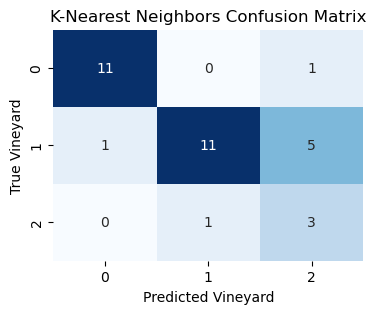

In [18]:
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("K-Nearest Neighbors Confusion Matrix")
plt.xlabel("Predicted Vineyard")
plt.ylabel("True Vineyard")
plt.show()

## Results Discussion and Conclusion
In this study, we explored the classification of wines based on their origin from three distinct vineyards using various wine constituents. The analysis included an unsupervised Agglomerative Clustering model and a supervised K-Nearest Neighbors model. The unsupervised model ended up performing much better than the supervised model, achieving an accuracy of 97.7% compared to the KNN model's accuracy of 75.8%. This suggests that the wine attributes provided sufficient intrinsic clustering patterns that the Agglomerative Clustering model could exploit effectively, possibly due to the distinct factors of each vineyard reflected in the wine's chemical composition. Future work could explore the integration of additional data sources, such as sensory analysis or genomic data, to further refine the classification models and extend their applicability to broader aspects of viticulture and enology.